In [30]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../python')
import plot_info


In [2]:
u1 = lambda x, y: np.sin(2*np.pi*(x+y))
u2 = lambda x, y: np.cos(2*np.pi*(x+y))

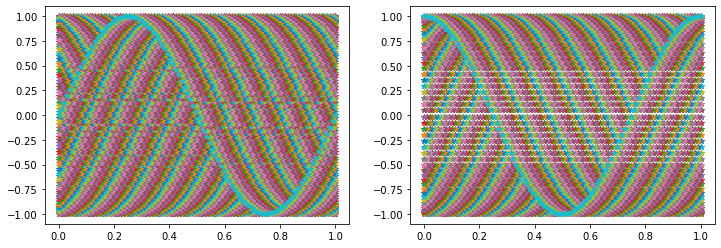

In [3]:
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

for yi in y:
    ax1.plot(x, u1(x, yi), '*')
    ax2.plot(x, u2(x, yi), '*')
plt.show()
    

In [19]:
def f(u):
    return 0.5*u**2
def godunov(uleft, uright):
    return np.maximum(f(np.maximum(uleft, np.zeros_like(uleft))), \
                      f(np.minimum(uright, np.zeros_like(uright))))
    
def solve_burgers(u0, T, N, periodic=True):
    x, dx = np.linspace(0, 1, N+1, retstep=True)
    u0vec = u0(x)
    t = 0
    u = u0vec
    dt = 0.5 * dx / np.max(abs(u))
    while t < T:
        t+= dt
        u[1:-1] = u[1:-1] - dt/dx * (godunov(u[1:-1], u[2:]) - godunov(u[0:-2], u[1:-1]))
        if periodic:
            u[0] = u[-2]
            u[-1] = u[1]
        else:
            u[0] = u[1]
            u[-1] = u[-2]
        dt =  0.5 * dx / np.max(abs(u))
    return x, u

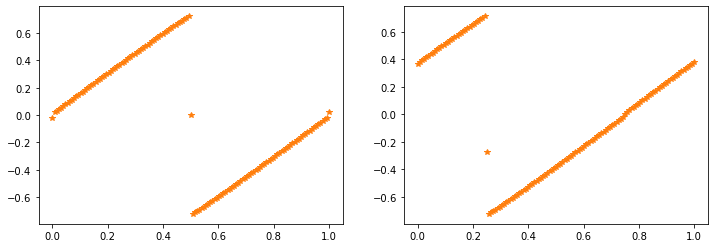

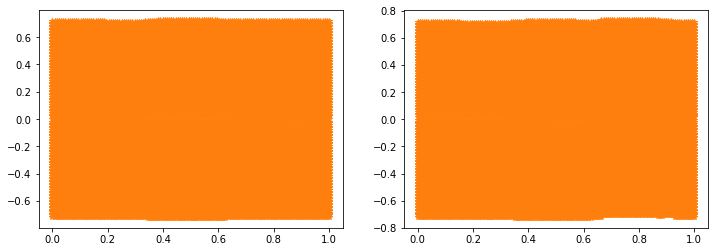

In [18]:
N=128
y = np.linspace(0,1,N)
T=0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))


for yi in [0.0]:
    x1, u1sol = solve_burgers(lambda x: u1(x, yi), T, N)
    ax1.plot(x1, u1sol, '*', color='C1')
    x2, u2sol = solve_burgers(lambda x: u2(x, yi), T, N)
    ax2.plot(x2, u2sol, '*', color='C1')
plt.show()



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))


for yi in y:
    x1, u1sol = solve_burgers(lambda x: u1(x, yi), T, N)
    ax1.plot(x1, u1sol, '*', color='C1')
    x2, u2sol = solve_burgers(lambda x: u2(x, yi), T, N)
    ax2.plot(x2, u2sol, '*', color='C1')
plt.show()

In [ ]:
u1 = lambda x, y: (1 + y) * (x<0.5) + y * (x>=0.5)
u2 = lambda x, y: (1 + y) * (x<0.5) + (1-y) * (x>=0.5)

x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

for yi in y:
    ax1.plot(x, u1(x, yi), '*', color='C0')
    ax2.plot(x, u2(x, yi), '*', color='C0')
    
plt.show()


for yi in y:
    plt.plot(x, u1(x, yi), '*', color='C0')
    
plot_info.showAndSave(f"initial_non_unique")


N=128
y = np.linspace(0,1,N)
T=0.2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))


for yi in [0.2]:
    x1, u1sol = solve_burgers(lambda x: u1(x, yi), T, N, periodic=False)
    ax1.plot(x1, u1sol, '*', color='C0')
    ax1.set_ylim([0, 2])
    x2, u2sol = solve_burgers(lambda x: u2(x, yi), T, N, periodic=False)
    ax2.plot(x2, u2sol, '*', color='C0')
    ax2.set_ylim([0, 2])
plt.show()



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))


for yi in y:
    x1, u1sol = solve_burgers(lambda x: u1(x, yi), T, N, periodic=False)
    ax1.plot(x1, u1sol, '*', color='C0')
    ax1.set_ylim([0, 2])
    x2, u2sol = solve_burgers(lambda x: u2(x, yi), T, N, periodic=False)
    ax2.plot(x2, u2sol, '*', color='C0')
    ax2.set_ylim([0, 2])
plt.show()